# My lyrics extractor 
The project is aimed to be a help for lyrics enthusiast. This code extracts the word cound of the occurring words in lyrics of a particular song entered as url by the user.

Importing all the required Libraries

In [10]:
import requests
from bs4 import BeautifulSoup
import operator
import pandas as pd
import seaborn as sns

Return a word list containing all the words in lyrics

In [11]:
def word_finder(url):  #this returs a list of words in lyrics 
    word_list = []
    source_code = requests.get(url).text
    soup = BeautifulSoup(source_code,'lxml')
    for post_text in soup.find_all('p',{'class':'verse'}):
        content = post_text.get_text()
        words = content.lower().split()
        for each_word in words:
#             print(each_word)
            word_list.append(each_word)
    return word_list

Cleaning the word list by removing all puntuations.

In [12]:
def clean_list(url):
    word_list = word_finder(url)
    clean_word_list = []
    for word in word_list:
        if word[-1] is "," or "\"" or "(" or ")" or "?":
            word = word.replace(',' , '')
            word = word.replace("\"","")
            word = word.replace(")","")
            word = word.replace("(","")
            word = word.replace("?","")
        elif word[0] is "\"":
            word = word.replace("\"","")
            word = word.replace(")","")
            word = word.replace("(","")
#         print (word)
        clean_word_list.append(word)
    return clean_word_list

Creating a dictionary of words and their frequency

In [13]:
def create_dictionary(url):
    clean_word_list =  clean_list(url)
    word_count = {}
    for word in clean_word_list:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

Importing and saving that Dictionary into a CSV file

In [14]:
def construct_csv(url):
    word_dict = create_dictionary(url)
    output = pd.DataFrame(word_dict,index=[0]).transpose()
    output.reset_index(inplace=True)
    output.columns = ['words','counts']
    output.sort_values(['counts'],ascending=False,inplace=True)
    output.reset_index(drop=True,inplace=True)
    return output
 

In [15]:
url = input('Enter your URL:')
output = construct_csv(url)
name = str(url[27:-5]) + '.csv'
output.to_csv(name)

Enter your URL:http://www.metrolyrics.com/stressed-out-lyrics-twenty-one-pilots.html


In [16]:
output

,words,counts
0,to,33
1,i,18
2,we,15
3,used,13
4,but,11
5,the,11
6,now,10
7,out,10
8,wish,10
9,pretend,9


In [17]:
lst = pd.DataFrame({'words':clean_list(url)})

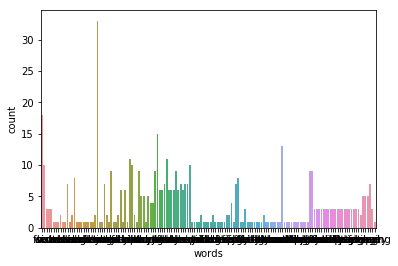

In [18]:
ax = sns.countplot(x="words", data=lst)
ax.figure.savefig('top_venues.png')